# Stock on Graph

SEOYEON CHOI  
7/8/23

# Import

In [1]:
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)
from haversine import haversine
from IPython.display import HTML
import plotly.graph_objects as go

In [2]:
import rpy2
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

# Data intro(2020\~2022)

## Korea

In [3]:
df_korea = pd.read_csv('./dataset/korea_kospi.csv')

In [4]:
df_korea = pd.concat([df_korea,pd.DataFrame({'Country': "Korea",
                                             'Value':(df_korea['Close'] - df_korea['Close'].mean())/df_korea['Close'].std()})],axis=1)


In [5]:
df_korea_add = df_korea.assign(Year = list(map(lambda x: x.split('-')[0],df_korea['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],df_korea['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],df_korea['Date'])))

In [6]:
df_korea_add.Year = df_korea_add.Year.astype(np.float64)
df_korea_add.Mon = df_korea_add.Mon.astype(np.float64)
df_korea_add.Day = df_korea_add.Day.astype(np.float64)

In [7]:
df_korea_covid = df_korea_add.query("Year>=2020 and Year <= 2022");df_korea_covid

In [8]:
# plt.figure(figsize=(30, 8)) 
# plt.title('Korea (close)')
# plt.xticks(rotation=45) 
# plt.plot(df_korea_covid['Date'], df_korea_covid['Close'], 'co-')
# plt.grid(color='gray', linestyle='--')

## US

In [9]:
df_us = pd.read_csv('./dataset/us_nasdaq.csv')

In [10]:
df_us = pd.concat([df_us,pd.DataFrame({'Country': 'United States of America',
                                             'Value':(df_us['Close'] - df_us['Close'].mean())/df_us['Close'].std()})],axis=1)

In [11]:
df_us_add = df_us.assign(Year = list(map(lambda x: x.split('-')[0],df_us['Date'])),\
                            Mon = list(map(lambda x: x.split('-')[1],df_us['Date'])),\
                            Day = list(map(lambda x: x.split('-')[2],df_us['Date'])))

In [12]:
df_us_add.Year = df_us_add.Year.astype(np.float64)
df_us_add.Mon = df_us_add.Mon.astype(np.float64)
df_us_add.Day = df_us_add.Day.astype(np.float64)

In [13]:
df_us_covid = df_us_add.query("Year>=2020 and Year <=2022");df_us_covid

In [14]:
# plt.figure(figsize=(30, 8)) 
# plt.title('US (close)')
# plt.xticks(rotation=45) 
# plt.plot(df_us_covid['Date'], df_us_covid['Close'], 'co-')
# plt.grid(color='gray', linestyle='--')

## China

In [15]:
df_china = pd.read_csv('./dataset/china_ssec.csv')

In [16]:
df_china = pd.concat([df_china,pd.DataFrame({'Country': 'China',
                                             'Value':(df_china['Close'] - df_china['Close'].mean())/df_china['Close'].std()})],axis=1)

In [17]:
df_china_add = df_china.assign(Year = list(map(lambda x: x.split('-')[0],df_china['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],df_china['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],df_china['Date'])))

In [18]:
df_china_add.Year = df_china_add.Year.astype(np.float64)
df_china_add.Mon = df_china_add.Mon.astype(np.float64)
df_china_add.Day = df_china_add.Day.astype(np.float64)

In [19]:
df_china_covid = df_china_add.query("Year>=2020 and Year <=2022");df_china_covid

In [20]:
# plt.figure(figsize=(30, 8)) 
# plt.title('China (close)')
# plt.xticks(rotation=45) 
# plt.plot(df_china_covid['Date'], df_china_covid['Close'], 'co-')
# plt.grid(color='gray', linestyle='--')

## Japan

In [21]:
df_japan = pd.read_csv('./dataset/japan_n225.csv')

In [22]:
df_japan = pd.concat([df_japan,pd.DataFrame({'Country': 'Japan',
                                             'Value':(df_japan['Close'] - df_japan['Close'].mean())/df_japan['Close'].std()})],axis=1)

In [23]:
df_japan_add = df_japan.assign(Year = list(map(lambda x: x.split('-')[0],df_japan['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],df_japan['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],df_japan['Date'])))

In [24]:
df_japan_add.Year = df_japan_add.Year.astype(np.float64)
df_japan_add.Mon = df_japan_add.Mon.astype(np.float64)
df_japan_add.Day = df_japan_add.Day.astype(np.float64)

In [25]:
df_japan_covid = df_japan_add.query("Year>=2020 and Year<=2022");df_japan_covid

In [26]:
# plt.figure(figsize=(30, 8)) 
# plt.title('Japan (close)')
# plt.xticks(rotation=45) 
# plt.plot(df_japan_covid['Date'], df_japan_covid['Close'], 'co-')
# plt.grid(color='gray', linestyle='--')

In [27]:
# with plt.style.context('seaborn-white'):
#     fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(30,15))
#     ax1.plot(df_korea_covid['Date'], df_korea_covid['Close'])
#     ax2.plot(df_us_covid['Date'], df_us_covid['Close'])
#     ax3.plot(df_china_covid['Date'], df_china_covid['Close'])
#     ax4.plot(df_japan_covid['Date'], df_japan_covid['Close'])

In [28]:
df = pd.concat([df_korea_covid,df_us_covid,df_china_covid,df_japan_covid]);df

In [29]:
df['Country'].unique()

# COVID(2020\~2022)

Ref: [WHO](https://covid19.who.int/data),
[질병관리청](https://ncov.kdca.go.kr/)

In [30]:
covid = pd.read_csv('./dataset/WHO-COVID-19-global-data.csv').iloc[:,[0,1,2,4,6]];covid

In [31]:
covid['Country'].unique()

In [32]:
covid.query("Country_code =='KP'")['New_cases'].unique()

In [33]:
_korea_covid = pd.read_excel('./dataset/covid_korea.csv');_korea_covid[:10]

In [34]:
korea_covid = _korea_covid.assign(New_cases=np.where(_korea_covid['Unnamed: 2'] == '-', 0, _korea_covid['Unnamed: 2']),\
                                  New_deaths=np.where(_korea_covid['Unnamed: 4'] == '-', 0, _korea_covid['Unnamed: 4']),\
                                  Date_reported=list(map(lambda x: str(x).split()[0],_korea_covid['Unnamed: 0'])),\
                                  Country='Korea',Country_code='KP').\
                             iloc[5:,[7,9,8,6,5]];korea_covid

In [35]:
covid_final = pd.concat([covid, korea_covid]).rename(columns={'Date_reported': 'Date'});covid_final

In [36]:
covid_final_add = covid_final.assign(Year = list(map(lambda x: x.split('-')[0],covid_final['Date'])),\
                                    Mon = list(map(lambda x: x.split('-')[1],covid_final['Date'])),\
                                    Day = list(map(lambda x: x.split('-')[2],covid_final['Date'])))

In [37]:
covid_final_add

In [38]:
# with plt.style.context('seaborn-white'):
#     fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(30,15))
#     ax1.plot(covid_final_add.query("Country =='Korea'")['Date'], covid_final_add.query("Country =='Korea'")['New_cases'])
#     ax2.plot(covid_final_add.query("Country =='United States of America'")['Date'], covid_final_add.query("Country =='United States of America'")['New_cases'])
#     ax3.plot(covid_final_add.query("Country =='China'")['Date'], covid_final_add.query("Country =='China'")['New_cases'])
#     ax4.plot(covid_final_add.query("Country =='Japan'")['Date'], covid_final_add.query("Country =='Japan'")['New_cases'])

# define class

In [41]:
class Stock_graph:
    def __init__(self,df):
        self.df = df 
        self.f = df.Value.to_numpy()
        self.year = df.Year.to_numpy()
        self.mon = df.Mon.to_numpy()
        self.day = df.Day.to_numpy()
        self.country = df.Country
        self.n = len(self.f)
        
        self.theta= None
    def get_distance(self):
        self.D = np.zeros([self.n,self.n])
        locations = np.stack([self.lat, self.long],axis=1)
        for i in tqdm.tqdm(range(self.n)):
            for j in range(i,self.n): 
                self.D[i,j]=haversine(locations[i],locations[j])
        self.D = self.D+self.D.T
    def get_weightmatrix(self,theta=1,beta=0.5,kappa=4000):
        self.theta = theta
        dist = np.where(self.D<kappa,self.D,0)
        self.W = np.exp(-(dist/self.theta)**2)

    def _eigen(self):
        d= self.W.sum(axis=1)
        D= np.diag(d)
        self.L = np.diag(1/np.sqrt(d)) @ (D-self.W) @ np.diag(1/np.sqrt(d))
        self.lamb, self.Psi = np.linalg.eigh(self.L)
        self.Lamb = np.diag(self.lamb)    
        
    def fit(self,ref=0.5): # fit with ebayesthresh
        self._eigen()
        self.fbar = self.Psi.T @ self.f # fbar := graph fourier transform of f
        self.power = self.fbar**2 
        ebayesthresh = importr('EbayesThresh').ebayesthresh
        self.power_threshed=np.array(ebayesthresh(FloatVector(self.fbar**2)))
        self.fbar_threshed = np.where(self.power_threshed>0,self.fbar,0)
        self.fhat = self.Psi@self.fbar_threshed
        self.df = self.df.assign(ValueHat = self.fhat)
        self.df = self.df.assign(Residual = self.df.Value- self.df.ValueHat)

# 시도 1

In [42]:
rst = Stock_graph(df)

In [43]:
len(rst.df)

In [44]:
T = len(rst.df)

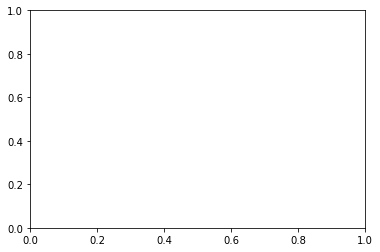

In [55]:
plt.scatter(rst.df[rst.df['Country']=='Korea'].iloc[:,[8,9]],rst.df[rst.df['Country']=='Japan'].iloc[:,[8,9]])

In [53]:
rst.df[rst.df['Country']=='Japan'].iloc[:,[8,9]]

In [ ]:
W = np.zeros((T,T))
for i in range(T):
    for j in range(T):
        if np.abs(i-j) ==1 :
            W[i,j] = 1
        else:
            W[i,j] = 0

In [ ]:
W

In [ ]:
rst.W = W

In [ ]:
rst.fit()

## Result

In [ ]:
rst.df.merge(covid_final_add,on='Date').sort_values("Residual",ascending=False).iloc[:30,:]

# 시도 2

In [ ]:
rst2 = Stock_graph(df)

In [ ]:
len(rst2.df)

In [ ]:
T

In [ ]:
rst2.df

In [ ]:
rst2.df.sort_values('Country').iloc[:,[9,10]].reset_index().iloc[:,1:].pivot(columns='Country', values='Value').iloc[:,1].dropna()

## Result

In [ ]:
covid_final_add